In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import warnings
warnings.filterwarnings("ignore")

# Keras 가 Tensorflow 를 벡엔드로 사용할 수 있도록 설정합니다.
os.environ["KERAS_BACKEND"] = "tensorflow"

# 실험을 재현하고 동일한 결과를 얻을 수 있는지 확인하기 위해 seed 를 설정합니다.
seed = 2019
np.random.seed(seed)
tf.set_random_seed(seed)

In [2]:
url = "C:\\Users\\puppy\\Desktop\\uci-secom.csv"
secom = pd.read_csv(url,sep=",")
secom = secom.drop(secom.columns[0], axis=1)
y = secom.loc[:,secom.columns[-1]]
secom = secom.drop(secom.columns[-1], axis=1)
print(secom)
print(y)

# delim_whitespace = True : 빈 공간(' ')을 구분자로 인식하고 데이터 읽어옴
# squeeze 만약 컬럼 하나만 읽어오면 데이터 구조를 Series로 읽어옴

print('The dataset has {} observations/rows and {} variables/columns.'.format(secom.shape[0], secom.shape[1]))
print('The majority class has {} observations, minority class {}.'.format(y[y == -1].size, y[y == 1].size))
print('The dataset is imbalanced. The ratio of majority class to minority class is {%.2f}:1.' % (float(y[y == -1].size/y[y == 1].size)))

            0        1          2          3       4      5         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5     2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6     3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
7     3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
8     2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
9     3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
10    2994.05  2548.21  2195.1222  1046.1468  1.3204  100.0  103.3400  0.1223   
11    2928.84  2479.40  2196

In [3]:
dropthese = [i for i in secom.columns if secom[i].std() == 0]
print(len(dropthese))
secom_categorical = secom.drop(dropthese, axis = 1)

116


In [4]:
secom_categorical.shape

(1567, 474)

In [5]:
feature_names = secom_categorical.columns
m = list((map(lambda i: sum(secom_categorical[i].isnull()), feature_names)))

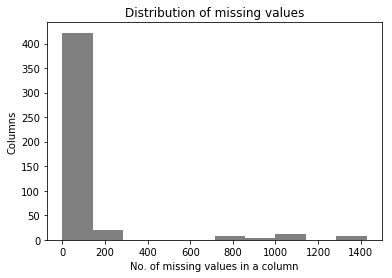

In [6]:
# distribution of columns with missing entries
plt.hist(m, color='gray')
plt.title("Distribution of missing values")
plt.xlabel("No. of missing values in a column")
plt.ylabel("Columns")
plt.savefig('missing.png')
plt.show()

In [7]:
print(len(m))
m_200thresh = list(filter(lambda i: (m[i] > 1), range(secom_categorical.shape[1])))
print(len(m_200thresh))

474
342


In [8]:
1567*0.6

940.1999999999999

In [9]:
m_940thresh = list(filter(lambda i: sum(secom_categorical[i].isnull()) > 940, secom_categorical.columns))
len(m_940thresh)

24

In [10]:
m_940thresh

['85',
 '109',
 '110',
 '111',
 '157',
 '158',
 '220',
 '244',
 '245',
 '246',
 '292',
 '293',
 '358',
 '382',
 '383',
 '384',
 '492',
 '516',
 '517',
 '518',
 '578',
 '579',
 '580',
 '581']

In [11]:
secom_drop_940thresh = secom_categorical.drop(m_940thresh, 1)

In [12]:
secom_drop_940thresh.shape

(1567, 450)

In [13]:
for column in secom_drop_940thresh:
    mean = secom_drop_940thresh[column].mean()
    secom_drop_940thresh.loc[secom_drop_940thresh[column].isnull(), column] = mean

In [14]:
secom_drop_940thresh

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,3030.930000,2564.00,2187.733300,1411.126500,1.360200,97.613300,0.1242,1.500500,0.016200,-0.003400,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.780000,2465.14,2230.422200,1463.660600,0.829400,102.343300,0.1247,1.496600,-0.000500,-0.014800,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.610000,2559.94,2186.411100,1698.017200,1.510200,95.487800,0.1241,1.443600,0.004100,0.001300,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.720000,2479.90,2199.033300,909.792600,1.320400,104.236700,0.1217,1.488200,-0.012400,-0.003300,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.240000,2502.87,2233.366700,1326.520000,1.533400,100.396700,0.1235,1.503100,-0.003100,-0.007200,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200
5,2946.250000,2432.84,2233.366700,1326.520000,1.533400,100.396700,0.1235,1.528700,0.016700,0.005500,...,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.034200,0.015100,0.005200,44.007700
6,3030.270000,2430.12,2230.422200,1463.660600,0.829400,102.343300,0.1247,1.581600,-0.027000,0.010500,...,1.1958,8.3645,0.5010,0.0143,0.0042,2.8515,0.034200,0.015100,0.005200,44.007700
7,3058.880000,2690.15,2248.900000,1004.469200,0.788400,106.240000,0.1185,1.515300,0.015700,0.000700,...,56.4274,16.0862,0.4984,0.0106,0.0034,2.1261,0.020400,0.019400,0.006300,95.031000
8,2967.680000,2600.47,2248.900000,1004.469200,0.788400,106.240000,0.1185,1.535800,0.011100,-0.006600,...,1.3248,14.2892,0.4993,0.0172,0.0046,3.4456,0.011100,0.012400,0.004500,111.652500
9,3016.110000,2428.37,2248.900000,1004.469200,0.788400,106.240000,0.1185,1.538100,0.015900,0.004900,...,0.6636,7.4181,0.4967,0.0152,0.0038,3.0687,0.021200,0.019100,0.007300,90.229400


In [15]:
def minmaxProcess(X_thresh):
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(feature_range=(-1, 1))
    mms_scale_params = scaler.fit(X_thresh)

    scaled_X_train = mms_scale_params.transform(X_thresh)

    scaled_df_X_train = pd.DataFrame(scaled_X_train, index= X_thresh.index, columns= X_thresh.columns)

    return scaled_df_X_train

In [16]:
secom_min_max = minmaxProcess(secom_drop_940thresh)

In [17]:
secom_min_max

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,-0.061539,0.178583,-0.001807,-0.240317,-0.998781,-0.342876,0.931571,0.330039,0.084957,-0.283276,...,-0.977431,-0.775512,0.41875,-0.975351,-0.964981,-0.976240,-0.359091,-0.653849,-0.689614,-0.729637
1,0.150006,-0.108930,0.333525,-0.212035,-0.999734,-0.142117,0.939347,0.313279,-0.175370,-0.542662,...,-0.990131,-0.863208,0.50625,-0.930727,-0.926070,-0.933802,-0.557226,-0.559322,-0.637681,-0.435228
2,-0.382264,0.166776,-0.012193,-0.085869,-0.998512,-0.433090,0.930016,0.085518,-0.103663,-0.176337,...,-0.968102,-0.898459,0.12500,-0.958776,-0.957198,-0.959697,0.258145,0.178618,0.000000,-0.775235
3,-0.199230,-0.066004,0.086957,-0.510211,-0.998853,-0.061754,0.892691,0.277181,-0.360873,-0.281001,...,-0.975604,-0.913376,0.32500,-0.981725,-0.984436,-0.982531,-0.380117,-0.694915,-0.753623,-0.799694
4,-0.057265,0.000800,0.356655,-0.285865,-0.998470,-0.224738,0.920684,0.341212,-0.215900,-0.369738,...,-0.977805,-0.861703,-0.86250,1.000000,1.000000,1.000000,-0.380117,-0.694915,-0.753623,-0.799694
5,-0.337770,-0.202868,0.356655,-0.285865,-0.998470,-0.224738,0.920684,0.451225,0.092751,-0.080774,...,-0.977623,-0.800959,0.06875,-0.945176,-0.947471,-0.946382,-0.146199,-0.689700,-0.695652,-0.880625
6,-0.063692,-0.210778,0.333525,-0.212035,-0.999734,-0.142117,0.939347,0.678556,-0.588465,0.032992,...,-0.988142,-0.918108,0.45000,-0.964726,-0.951362,-0.966281,-0.146199,-0.689700,-0.695652,-0.880625
7,0.029636,0.545464,0.478673,-0.459242,-0.999808,0.023274,0.842924,0.393640,0.077163,-0.189989,...,0.242510,-0.750932,0.28750,-0.980450,-0.966926,-0.981069,-0.376775,-0.577575,-0.615942,-0.742221
8,-0.267864,0.284649,0.478673,-0.459242,-0.999808,0.023274,0.842924,0.481736,0.005456,-0.356086,...,-0.985267,-0.789838,0.34375,-0.952401,-0.943580,-0.954170,-0.532164,-0.760104,-0.746377,-0.697133
9,-0.109882,-0.215868,0.478673,-0.459242,-0.999808,0.023274,0.842924,0.491620,0.080281,-0.094425,...,-1.000000,-0.938598,0.18125,-0.960901,-0.959144,-0.961853,-0.363409,-0.585398,-0.543478,-0.755245


In [18]:
from sklearn.decomposition import PCA
# PCA 인스턴스 객체를 생성.
pca = PCA(n_components=35)

In [19]:
pca.fit(secom_min_max)
secom_pca = pca.transform(secom_min_max)

In [20]:
secom_pca.explained_variance_ratio_ 

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [ ]:
df_pca = pd.DataFrame(secom_pca)

In [25]:
pca.explained_variance_ratio_

array([0.0533972 , 0.03974187, 0.03755091, 0.03188386, 0.02744039,
       0.02486396, 0.02381306, 0.02206812, 0.02154919, 0.02060127,
       0.01891076, 0.01808817, 0.0179549 , 0.01759205, 0.01566467,
       0.01534826, 0.01507609, 0.01460261, 0.01359667, 0.01347911,
       0.01270182, 0.01221374, 0.01219665, 0.01162531, 0.01146921,
       0.01118788, 0.0105583 , 0.00996965, 0.0098047 , 0.00943824,
       0.00928813, 0.00911903, 0.00888523, 0.00854475, 0.00816009])

In [23]:
backyard = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
backyard

,0
0,0.053397
1,0.093139
2,0.130690
3,0.162574
4,0.190014
5,0.214878
6,0.238691
7,0.260759
8,0.282309
9,0.302910


In [26]:
print(type(secom_pca))
print(type(y))
y = y.values
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(secom_pca, y, test_size=0.2, random_state=seed, stratify=y)

In [31]:
print(len(X_train))
print(len(X_test))
a = 0
b = 0
for i in y_train:
    if i == 1:
        a=a+1
    else :
        b=b+1

print(a,b)
a=0
b=0
for i in y_test:
    if i == 1:
        a=a+1
    else :
        b=b+1
print(a,b)

1253
314
83 1170
21 293


In [32]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import random as rd
import math
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [33]:
def mlpClassfier(X_train, y_train, epoch=30, neurons=40, learning_rate=0.001, activation="tanh", batch_size= 800):
    model = Sequential()
    model.add(Dense(input_dim=X_train.shape[1],units=neurons,activation=activation))
    model.add(Dense(1,activation="tanh"))
    optimizer = Adam(lr=learning_rate,beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=epoch, batch_size=batch_size)
    return model

In [ ]:
num_epochs = 500
n_fold = 5
neurons = [110,120,130,140,150,160,170,180]
learning_rate = [0.00003,0.00004,0.00005,0.00006,0.00007,0.0001]
activation = ["tanh","linear","softsign"]
finer_hyperparameters_list = []
time = 0
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state=seed) # 데이터셋을 5개로 나누고 shuffle 옵션 값을 True로 설정

In [34]:
def scale_predict(y_set):
    for i,name in enumerate(y_set):
        if name<0 :
            y_set[i] = -1
        elif name>=0 :
            y_set[i] = 1
    return y_set

In [ ]:
for times in range(1,num_epochs+1):
    epoch = np.random.randint(low=1000, high=1800)
    c_neurons = rd.choice(neurons)
    c_learning_rate = rd.choice(learning_rate)
    c_activation = rd.choice(activation)
    k_neigh = 10
    recall_list = []
    precision_list = []
    f_measure_list = []
    fpr_list = []
    cnt = 0
    sm = SMOTE(random_state=seed, k_neighbors=10, sampling_strategy={1:1096,-1:2192})
    for tr_index, val_index in skf.split(X_train, y_train):
        skf_X_train, skf_X_val = X_train[tr_index], X_train[val_index]
        skf_y_train, skf_y_val = y_train[tr_index], y_train[val_index]
        cnt = cnt + 1
        time = time +1
        X_samp, y_samp = sm.fit_resample(skf_X_train,skf_y_train)
        model = mlpClassfier(X_samp,y_samp,epoch=epoch, neurons= c_neurons, learning_rate = c_learning_rate, activation =c_activation)
        predict = model.predict(skf_X_val)
        sca_predict = scale_predict(predict)
        table = confusion_matrix(skf_y_val, predict, labels=[1, -1])
        print(table)
        tp = table[0][0]
        fn = table[0][1]
        fp = table[1][0]
        tn = table[1][1]

        recall_value = tp/(tp+fn)
        precision_value = tp/(tp+fp)
        f_measure_value = (2*tp)/((2*tp)+fp+fn)
        fpr_value = fp/(fp+tn)
    
        recall_list.append(recall_value)
        precision_list.append(precision_value) 
        f_measure_list.append(f_measure_value) 
        fpr_list.append(fpr_value)
       
        if cnt == n_fold :
            
            recall = sum(recall_list)/n_fold
            precision = sum(precision_list)/n_fold        
            f_measure = sum(f_measure_list)/n_fold
            fpr = sum(fpr_list)/n_fold

            print(recall_list)
            print(precision_list) 
            print(f_measure_list)
            print(fpr_list)

            hyperparameters = {'epoch': epoch, 
                               'neurons' : c_neurons,
                               'learning_rage':c_learning_rate,
                               'activation':c_activation,
                               'k_neighbor':k_neigh,
                               "recall": recall,
                               "precision": precision,
                               "f_measure":f_measure,
                               "fpr": fpr,
                               "tp" : tp,
                               "fn" : fn,
                               "fp" : fp,
                               "tn" : tn
                              }

            finer_hyperparameters_list.append(hyperparameters)
            print("time : %d / epoch : %d / neurons : %d / learning_rate : %.4f / activation : %s / k_neighbor : %d / recall : %.4f / precision : %.4f / f_measure : %.4f / fpr : %.4f"%(time,epoch,c_neurons,c_learning_rate,c_activation,k_neigh,recall,precision,f_measure,fpr))
        print(time)
        del sca_predict
        del predict
        del model          

In [ ]:
import csv

with open("myfile5.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    sad = 0
    for i in finer_hyperparameters_list:
        if sad == 0:
            wr.writerow(i.keys())
        wr.writerow(i.values())
        sad = sad+1       

In [40]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [46]:
sm = SMOTE(random_state=seed, k_neighbors=10, sampling_strategy={1:1096,-1:2192})
X_samp, y_samp = sm.fit_resample(X_train,y_train)
model = mlpClassfier(X_samp,y_samp,epoch=1300, neurons= 150, learning_rate =0.00004, activation ="tanh")

Epoch 1/1300
3288/3288 [==============================] - 1s 247us/step - loss: -3.0032 - acc: 0.1320
Epoch 2/1300
3288/3288 [==============================] - 0s 9us/step - loss: -3.0190 - acc: 0.1329
Epoch 3/1300
3288/3288 [==============================] - 0s 9us/step - loss: -3.0401 - acc: 0.1320
Epoch 4/1300
3288/3288 [==============================] - 0s 10us/step - loss: -3.0609 - acc: 0.1320
Epoch 5/1300
3288/3288 [==============================] - 0s 8us/step - loss: -3.0803 - acc: 0.1320
Epoch 6/1300
3288/3288 [==============================] - 0s 9us/step - loss: -3.1042 - acc: 0.1323
Epoch 7/1300
3288/3288 [==============================] - 0s 12us/step - loss: -3.1262 - acc: 0.1314
Epoch 8/1300
3288/3288 [==============================] - 0s 9us/step - loss: -3.1408 - acc: 0.1332
Epoch 9/1300
3288/3288 [==============================] - 0s 9us/step - loss: -3.1602 - acc: 0.1326
Epoch 10/1300
3288/3288 [==============================] - 0s 10us/step - loss: -3.1679 - acc: 0

3288/3288 [==============================] - 0s 10us/step - loss: -3.9746 - acc: 0.1359
Epoch 82/1300
3288/3288 [==============================] - 0s 9us/step - loss: -3.9792 - acc: 0.1359
Epoch 83/1300
3288/3288 [==============================] - 0s 10us/step - loss: -3.9918 - acc: 0.1359
Epoch 84/1300
3288/3288 [==============================] - 0s 10us/step - loss: -4.0034 - acc: 0.1363
Epoch 85/1300
3288/3288 [==============================] - 0s 10us/step - loss: -4.0066 - acc: 0.1372
Epoch 86/1300
3288/3288 [==============================] - 0s 9us/step - loss: -3.9883 - acc: 0.1366
Epoch 87/1300
3288/3288 [==============================] - 0s 8us/step - loss: -4.0024 - acc: 0.1369
Epoch 88/1300
3288/3288 [==============================] - 0s 12us/step - loss: -4.0242 - acc: 0.1405
Epoch 89/1300
3288/3288 [==============================] - 0s 12us/step - loss: -4.0287 - acc: 0.1454
Epoch 90/1300
3288/3288 [==============================] - 0s 8us/step - loss: -4.0443 - acc: 0.145

3288/3288 [==============================] - 0s 10us/step - loss: -4.5707 - acc: 0.1442
Epoch 240/1300
3288/3288 [==============================] - 0s 10us/step - loss: -4.5710 - acc: 0.1439
Epoch 241/1300
3288/3288 [==============================] - 0s 9us/step - loss: -4.5745 - acc: 0.1439
Epoch 242/1300
3288/3288 [==============================] - 0s 8us/step - loss: -4.5757 - acc: 0.1445
Epoch 243/1300
3288/3288 [==============================] - 0s 10us/step - loss: -4.5772 - acc: 0.1442
Epoch 244/1300
3288/3288 [==============================] - 0s 8us/step - loss: -4.5795 - acc: 0.1439
Epoch 245/1300
3288/3288 [==============================] - 0s 9us/step - loss: -4.5870 - acc: 0.1436
Epoch 246/1300
3288/3288 [==============================] - 0s 10us/step - loss: -4.5954 - acc: 0.1436
Epoch 247/1300
3288/3288 [==============================] - 0s 9us/step - loss: -4.6055 - acc: 0.1436
Epoch 248/1300
3288/3288 [==============================] - 0s 10us/step - loss: -4.6077 - ac

3288/3288 [==============================] - 0s 10us/step - loss: -5.0444 - acc: 0.1582
Epoch 398/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.0487 - acc: 0.1569
Epoch 399/1300
3288/3288 [==============================] - 0s 11us/step - loss: -5.0530 - acc: 0.1572
Epoch 400/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.0546 - acc: 0.1578
Epoch 401/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.0515 - acc: 0.1563
Epoch 402/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.0605 - acc: 0.1557
Epoch 403/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.0646 - acc: 0.1560
Epoch 404/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.0669 - acc: 0.1563
Epoch 405/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.0790 - acc: 0.1560
Epoch 406/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.0800 - ac

3288/3288 [==============================] - 0s 10us/step - loss: -5.5672 - acc: 0.1688
Epoch 557/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.5688 - acc: 0.1688
Epoch 558/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.5665 - acc: 0.1685
Epoch 559/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.5702 - acc: 0.1688
Epoch 560/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.5725 - acc: 0.1691
Epoch 561/1300
3288/3288 [==============================] - 0s 12us/step - loss: -5.5739 - acc: 0.1691
Epoch 562/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.5809 - acc: 0.1685
Epoch 563/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.5828 - acc: 0.1703
Epoch 564/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.5241 - acc: 0.1727
Epoch 565/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.5207 - ac

3288/3288 [==============================] - 0s 10us/step - loss: -5.5950 - acc: 0.1794
Epoch 637/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.5954 - acc: 0.1794
Epoch 638/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.5958 - acc: 0.1794
Epoch 639/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.5961 - acc: 0.1794
Epoch 640/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.5964 - acc: 0.1797
Epoch 641/1300
3288/3288 [==============================] - 0s 11us/step - loss: -5.5967 - acc: 0.1797
Epoch 642/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.5971 - acc: 0.1797
Epoch 643/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.5974 - acc: 0.1797
Epoch 644/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.5978 - acc: 0.1797
Epoch 645/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.5956 - ac

3288/3288 [==============================] - 0s 9us/step - loss: -5.7670 - acc: 0.1837
Epoch 794/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.7674 - acc: 0.1837
Epoch 795/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.7681 - acc: 0.1840
Epoch 796/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.7707 - acc: 0.1840
Epoch 797/1300
3288/3288 [==============================] - 0s 12us/step - loss: -5.7713 - acc: 0.1837
Epoch 798/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.7717 - acc: 0.1837
Epoch 799/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.7747 - acc: 0.1834
Epoch 800/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.7775 - acc: 0.1834
Epoch 801/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.7753 - acc: 0.1831
Epoch 802/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.7831 - acc:

3288/3288 [==============================] - 0s 10us/step - loss: -5.9092 - acc: 0.1898
Epoch 952/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9116 - acc: 0.1901
Epoch 953/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9150 - acc: 0.1901
Epoch 954/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9152 - acc: 0.1898
Epoch 955/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9133 - acc: 0.1901
Epoch 956/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9126 - acc: 0.1895
Epoch 957/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9154 - acc: 0.1895
Epoch 958/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.9138 - acc: 0.1895
Epoch 959/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.9091 - acc: 0.1898
Epoch 960/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9095 - acc: 

3288/3288 [==============================] - 0s 9us/step - loss: -5.9489 - acc: 0.2010
Epoch 1109/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.9497 - acc: 0.2010
Epoch 1110/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.9553 - acc: 0.2007
Epoch 1111/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9556 - acc: 0.2007
Epoch 1112/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.9573 - acc: 0.2007
Epoch 1113/1300
3288/3288 [==============================] - 0s 10us/step - loss: -5.9644 - acc: 0.2004
Epoch 1114/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.9748 - acc: 0.2007
Epoch 1115/1300
3288/3288 [==============================] - 0s 9us/step - loss: -5.9759 - acc: 0.2007
Epoch 1116/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.9738 - acc: 0.2004
Epoch 1117/1300
3288/3288 [==============================] - 0s 8us/step - loss: -5.97

3288/3288 [==============================] - 0s 10us/step - loss: -6.0999 - acc: 0.2092
Epoch 1266/1300
3288/3288 [==============================] - 0s 9us/step - loss: -6.0953 - acc: 0.2092
Epoch 1267/1300
3288/3288 [==============================] - 0s 12us/step - loss: -6.0983 - acc: 0.2095
Epoch 1268/1300
3288/3288 [==============================] - 0s 9us/step - loss: -6.0965 - acc: 0.2092
Epoch 1269/1300
3288/3288 [==============================] - 0s 11us/step - loss: -6.0966 - acc: 0.2089
Epoch 1270/1300
3288/3288 [==============================] - 0s 9us/step - loss: -6.0999 - acc: 0.2086
Epoch 1271/1300
3288/3288 [==============================] - 0s 8us/step - loss: -6.0958 - acc: 0.2086
Epoch 1272/1300
3288/3288 [==============================] - 0s 9us/step - loss: -6.0997 - acc: 0.2095
Epoch 1273/1300
3288/3288 [==============================] - 0s 8us/step - loss: -6.1001 - acc: 0.2095
Epoch 1274/1300
3288/3288 [==============================] - 0s 8us/step - loss: -6.10

In [37]:
predict = model.predict(X_test)
sca_predict = scale_predict(predict)
table = confusion_matrix(y_test, predict, labels=[1, -1])
print(table)

[[  9  12]
 [ 59 234]]


In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 150)               5400      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 5,551
Trainable params: 5,551
Non-trainable params: 0
_________________________________________________________________


In [38]:
tp = table[0][0]
fn = table[0][1]
fp = table[1][0]
tn = table[1][1]

recall_value = tp/(tp+fn)
precision_value = tp/(tp+fp)
f_measure_value = (2*tp)/((2*tp)+fp+fn)
fpr_value = fp/(fp+tn)

In [39]:
print("recall : %.4f / precision : %.4f / f-measure : %.4f / fpr : %.4f"%(recall_value,precision_value,f_measure_value,fpr_value))

recall : 0.4286 / precision : 0.1324 / f-measure : 0.2022 / fpr : 0.2014


In [48]:
tp = 5
fp = 25
fn = 27
tn = 411
recall_value = tp/(tp+fn)
precision_value = tp/(tp+fp)
f_measure_value = (2*tp)/((2*tp)+fp+fn)
fpr_value = fp/(fp+tn)
print("recall : %.4f / precision : %.4f / f-measure : %.4f / fpr : %.4f"%(recall_value,precision_value,f_measure_value,fpr_value))

recall : 0.1562 / precision : 0.1667 / f-measure : 0.1613 / fpr : 0.0573
